In [1]:
# .....................Importing Important libraries for Classification Models................
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file....
df=pd.read_csv('heartdisease.csv',names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


## Understanding Dataset:

1) Features/Attributes: 
   >> 1) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect                              
      2) thalach: maximum heart rate achieved                                    
      3) ca: number of major vessels (0-3) colored by flourosopy                 
      4) slope: the slope of the peak exercise ST segment                                     
             -- Value 1: upsloping                                            
             -- Value 2: flat                                       
             -- Value 3: downsloping                           
      5) oldpeak = ST depression induced by exercise relative to rest                 
      6) exang: exercise induced angina (1 = yes; 0 = no)               
      7) restecg: resting electrocardiographic results                   
             -- Value 0: normal                                 
             -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)   
             -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria           
      8) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)                         
      9) chol: serum cholestoral in mg/dl                      
      10) trestbps: resting blood pressure (in mm Hg on admission to the hospital)               
      11) cp: chest pain type                                         
             -- Value 1: typical angina                     
             -- Value 2: atypical angina                     
             -- Value 3: non-anginal pain                     
             -- Value 4: asymptomatic                    
      12) age: age in years                 
      13) sex: sex (1 = male; 0 = female)                           
      14) ca: number of major vessels (0-3) colored by flourosopy                        
     
2) Label/Target:                                
   >> num: diagnosis of heart disease (angiographic disease status)                
          -- Value 0: < 50% diameter narrowing                
          -- Value 1: > 50% diameter narrowing                             
      (in any major vessel: attributes 59 through 68 are vessels)         
      
3) So after analyzing i come to know that the data is categorical data thus i will use Logistic Regression and Classification      models.

## EDA(Exploratory Data Analysis) 

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 200 rows and 14 columns.
df.shape

(200, 14)

In [4]:
# As we can see there are lot of "?" present inplace where no data is given thus 
# we have to replacw it by NaN values for further evaluation.... 
df.replace(to_replace ="?",value =np.NaN,inplace=True) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
# checking the fist 10 rows of the dataset.....
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
6,65,1,4,150,236,1,1,105,1,0,NaN,NaN,NaN,3
7,60,1,3,180,0,0,1,140,1,1.5,2,NaN,NaN,0
8,60,1,3,120,0,NaN,0,141,1,2,1,NaN,NaN,3
9,60,1,2,160,267,1,1,157,0,0.5,2,NaN,NaN,1


In [6]:
# Checking the null vakues if any......
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [7]:
# Not much information is gained from this "ca" feature as out of 200 only 2 values are present...
df.drop(['ca'],axis=1,inplace=True)

In [8]:
# Checking Feature information......
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    144 non-null object
chol        193 non-null object
fbs         193 non-null object
restecg     200 non-null int64
thalach     147 non-null object
exang       147 non-null object
oldpeak     144 non-null object
slope       98 non-null object
thal        34 non-null object
num         200 non-null int64
dtypes: int64(5), object(8)
memory usage: 20.4+ KB


In [9]:
# Stastical Information of Features...
df.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [10]:
# Checking the unique values....
for col in df.columns.values:
    print("Number of unique values of {} : {} ".format(col,df[col].nunique()))

Number of unique values of age : 39 
Number of unique values of sex : 2 
Number of unique values of cp : 4 
Number of unique values of trestbps : 40 
Number of unique values of chol : 99 
Number of unique values of fbs : 2 
Number of unique values of restecg : 3 
Number of unique values of thalach : 59 
Number of unique values of exang : 2 
Number of unique values of oldpeak : 14 
Number of unique values of slope : 3 
Number of unique values of thal : 3 
Number of unique values of num : 5 


In [11]:
# we are being told in data description that:
#      num: diagnosis of heart disease (angiographic disease status)
#           -- Value 0: < 50% diameter narrowing
#           -- Value 1: > 50% diameter narrowing
# Thus converting the existing values of the target(0,1,2,3,4  >> 0 being no disease) into 0 and 1.
df['num'] = df.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [12]:
# Printing Data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,1
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,1
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,6,1
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,0


In [13]:
#lets check the correlation matrix
df.corr()

,age,sex,cp,restecg,num
age,1.000000,0.034230,-0.038280,0.002400,0.189692
sex,0.034230,1.000000,0.038036,0.060621,0.098854
cp,-0.038280,0.038036,1.000000,0.034790,0.256614
restecg,0.002400,0.060621,0.034790,1.000000,-0.059146
num,0.189692,0.098854,0.256614,-0.059146,1.000000


# Univariant Plots 

age           AxesSubplot(0.125,0.657941;0.227941x0.222059)
sex        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
cp         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
restecg       AxesSubplot(0.125,0.391471;0.227941x0.222059)
num        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

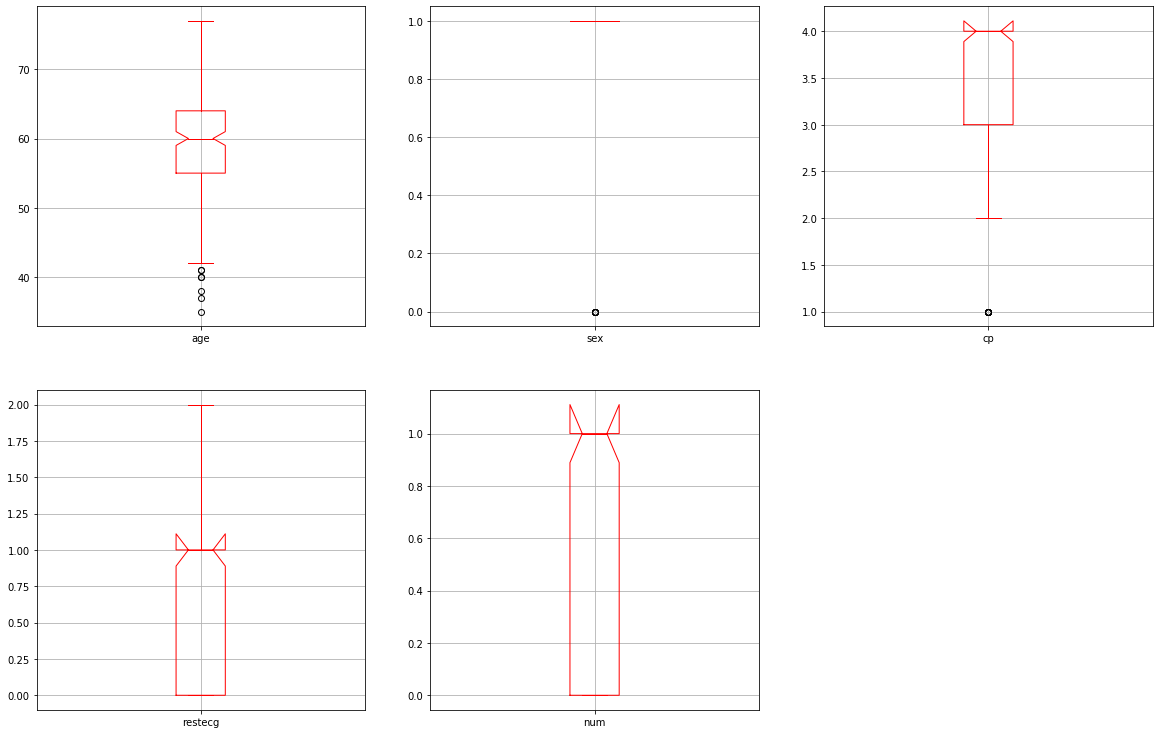

In [14]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True,color='red' ,legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002233C598988>,
      dtype=object)

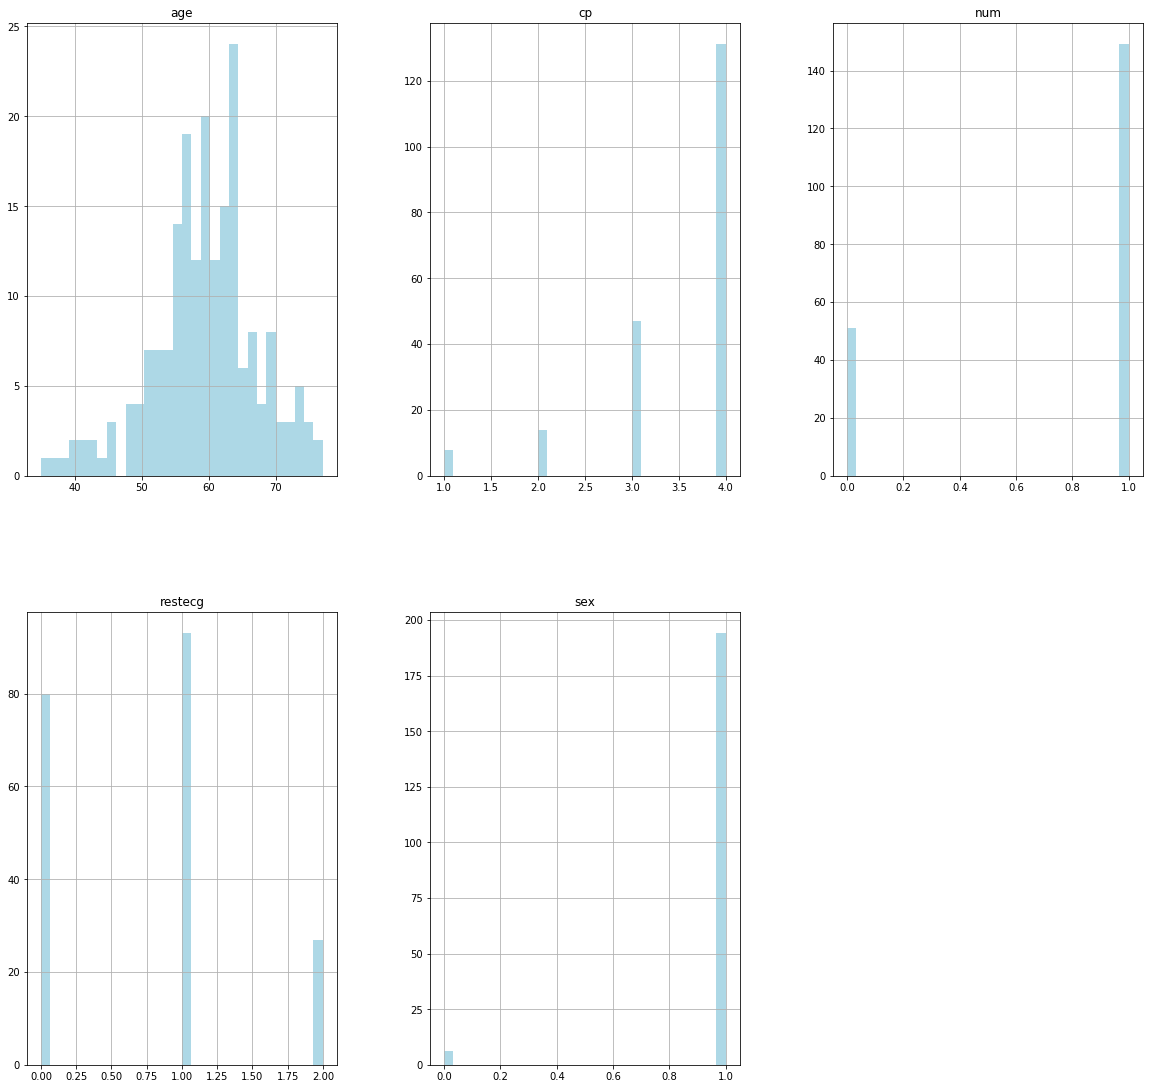

In [15]:
#Checking the Distribution using the histogram plot.
df.hist(figsize=(20,30),grid=True,layout=(3,3),bins=30,color='lightblue')

In [16]:
# counting number of persons having heart disease or not.....
df['num'].value_counts()

1    149
0     51
Name: num, dtype: int64

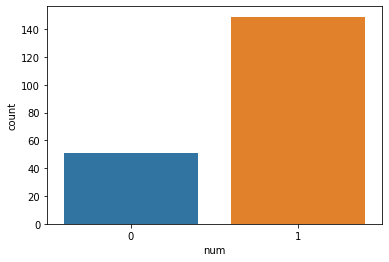

In [17]:
# graph to show whether a person have a heart disease or not.....
sns.countplot(df['num'],)

##### Conclusion:               
>> persons having heart disease are more.             
>> persons having heart disease are 149.                      
>> persons who don't have heart disease are 51.        


In [18]:
# Number of counts of chest pain...
df['cp'].value_counts()

4    131
3     47
2     14
1      8
Name: cp, dtype: int64

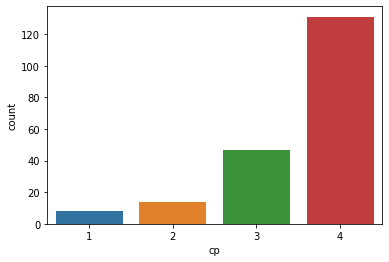

In [19]:
# graph to show whether a person have a heart disease or not.....
sns.countplot(df['cp'],)

##### Conclusion:                  
>> More number of persons have asymptomatic type chest pain. i.e 131 in numbers            
>> Decending order of Chest pain type people have : asymptomatic > anginal > atypical angina > typical angina        

In [20]:
# Counting Number of persons in each gender.....
df['sex'].value_counts()

1    194
0      6
Name: sex, dtype: int64

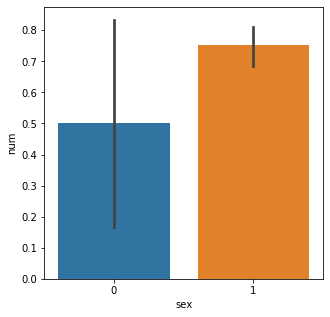

In [21]:
# Plotting Graph between sex and chances of heart disease......
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='num',data=df,)

###### Conclusion:                
>> Number of Males having heart diseases are more than the number of Females.             

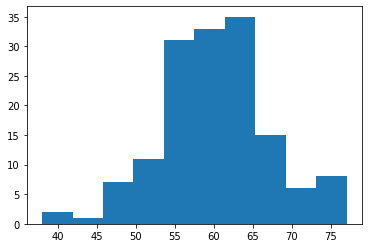

In [22]:
#we will check in which age interval heart disease are high
plt.hist(x="age",data=df.loc[df["num"]==1])
plt.show()

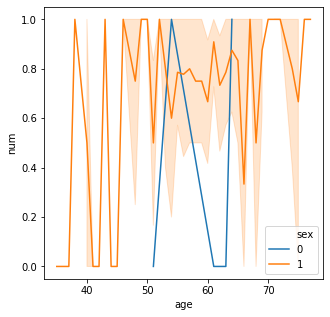

In [23]:
# Plotting Graph between age and chances of heart disease......
plt.figure(figsize=(5,5))
sns.lineplot(x='age',y='num',data=df,hue='sex')

##### Conclusion :                               
>> Persons having more age are more prone to heart disease.                                
>> Heart disease occurs in males occurs after the age of 45.          
>> According to the data which is less for females heart disease ocuurs after age of 50.  

<Figure size 720x720 with 0 Axes>

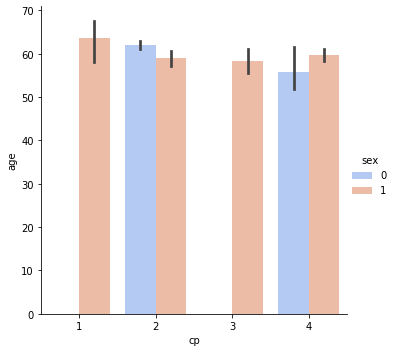

In [24]:
# Graph to show which gender have which type of chest pain....
plt.figure(figsize=(10,10))
sns.catplot(x='cp',y='age',data=df,kind='bar',hue='sex',palette='coolwarm')

 ##### Conclusion:          

>> Males have all types of chest pain while women have only atypical angina and asymptomatic types of chest pain.         
>> females have atypical angina type more than asymptomatic type.        
       
    cp: chest pain type                 
-- Value 1: typical angina                 
-- Value 2: atypical angina               
-- Value 3: non-anginal pain              
-- Value 4: asymptomatic             

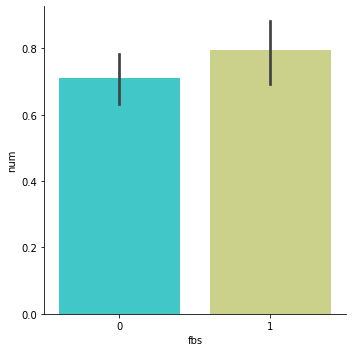

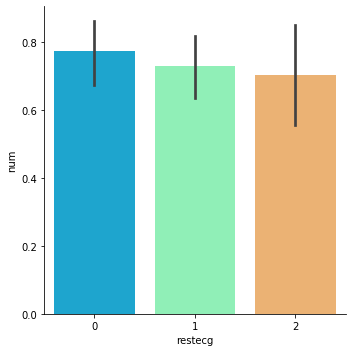

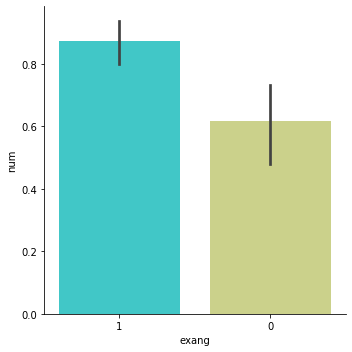

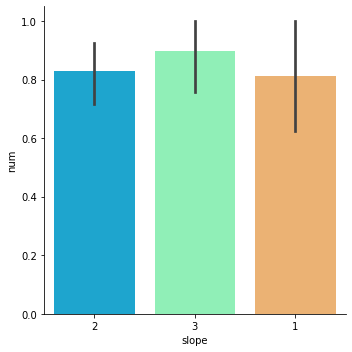

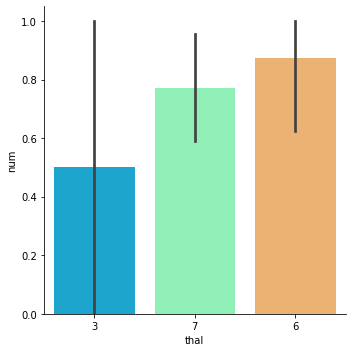

In [25]:
# 
m=df.drop(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach','oldpeak', 'num'],axis=1).columns.values
for i in m:
    sns.catplot(x=i, y="num", data=df,kind="bar",palette='rainbow');
    plt.tight_layout()

##### conclusion from graphs....                
>> Nothing extraordinary in fbs vs num.                                            
>> We realize that people with restecg '2' are much more likely to have a heart disease than with restecg '0' & '1'             
>> People with exang=0 i.e. Exercise induced angina are much more likely to have heart problems              
>> We observe, that Slope '1' causes heart pain much more than Slope '0' and '2'                    
>> We realize that people with thal '3' are much more likely to have a heart disease than with thal '7' & '6'          

In [26]:
# filling up NaN values with mean so that data analysis can be done....
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(df)
df_new=imp.fit_transform(df.values)
df_final=pd.DataFrame(data=df_new,columns=df.columns)
df_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63.0,1.0,4.0,140.000000,260.0,0.0,1.0,112.000000,1.000000,3.000000,2.000000,6.294118,1.0
1,44.0,1.0,4.0,130.000000,209.0,0.0,1.0,127.000000,0.000000,0.000000,2.132653,6.294118,0.0
2,60.0,1.0,4.0,132.000000,218.0,0.0,1.0,140.000000,1.000000,1.500000,3.000000,6.294118,1.0
3,55.0,1.0,4.0,142.000000,228.0,0.0,1.0,149.000000,1.000000,2.500000,1.000000,6.294118,1.0
4,66.0,1.0,3.0,110.000000,213.0,1.0,2.0,99.000000,1.000000,1.300000,2.000000,6.294118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,2.132653,6.294118,1.0
196,62.0,1.0,1.0,133.763889,139.0,0.0,1.0,122.795918,0.646259,1.320833,2.132653,6.294118,0.0
197,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,2.132653,6.000000,1.0
198,58.0,1.0,4.0,133.763889,385.0,1.0,2.0,122.795918,0.646259,1.320833,2.132653,6.294118,0.0


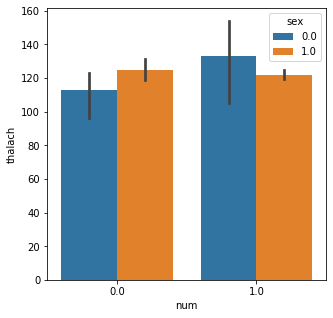

In [27]:
# Plotting Graph between num and  maximum heart rate......
plt.figure(figsize=(5,5))
sns.barplot(x='num',y='thalach',data=df_final,hue='sex',)

##### Conclusion:      
>> Women who has the heart disease got the value of thalach( maximum heart rate achieved) more than the number of males who        have the heart disease.    
     
>> Women who don't have the heart disease got the value of thalach( maximum heart rate achieved) less than the number of males     who have the heart disease.                       

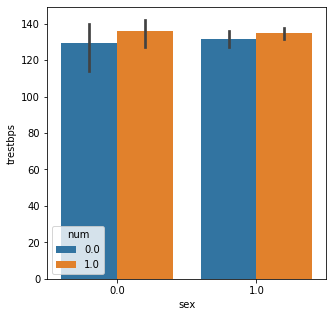

In [28]:
# Plotting Graph between sex and resting blood pressure......
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='trestbps',data=df_final,hue='num')

 ##### Conclusion:                                        
 >> Persons who have heart disease do have more trestbps( resting blood pressure) than the persons who don't have heart             disaese.           

In [29]:
df_final.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.634130
restecg     0.391463
thalach     0.148515
exang      -0.719015
oldpeak     0.423414
slope      -0.222767
thal       -4.724092
num        -1.132724
dtype: float64

In [30]:
# Removing Skewness
for i in df_final.columns:
    if df_final.skew().loc[i]>0.55:
        df_final[i]=np.log1p(df_final[i])

In [31]:
# checking the skewness
df_final.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.614590
restecg     0.391463
thalach     0.148515
exang      -0.719015
oldpeak     0.423414
slope      -0.222767
thal       -4.724092
num        -1.132724
dtype: float64

In [32]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df_final))
print(df_final.shape)
df_new=df_final.loc[(z<3).all(axis=1)]
print(df_new.shape)

(200, 13)
(177, 13)


age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
thal        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
num               AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

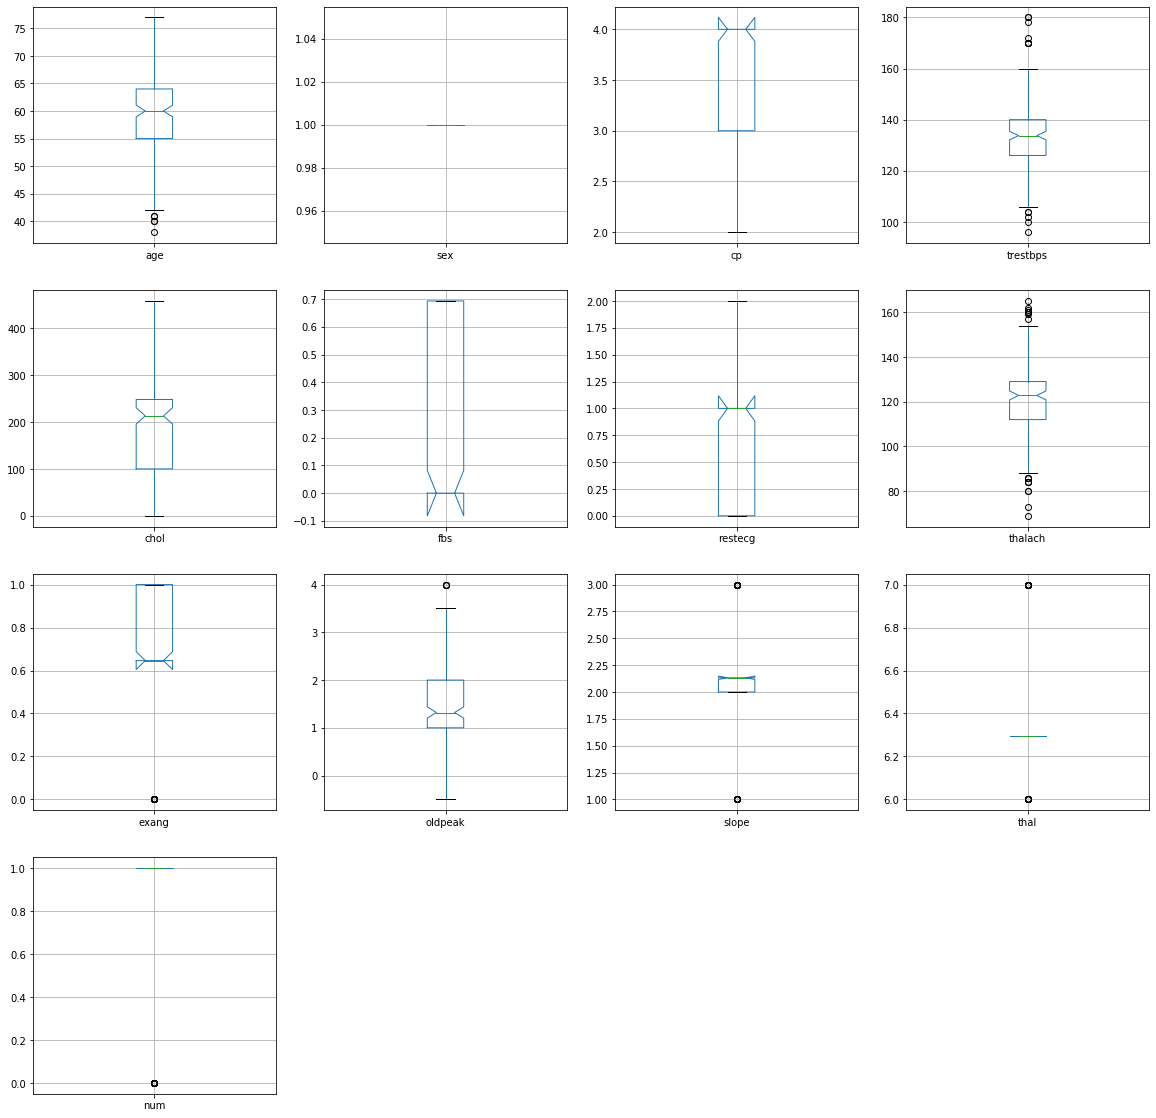

In [33]:
# Plotting the boxplot in order to check few statistical values and outliers
df_new.plot(kind='box', subplots=True, layout=(4,4),figsize=(20,20),grid=True,notch=True)

(13.0, 0.0)

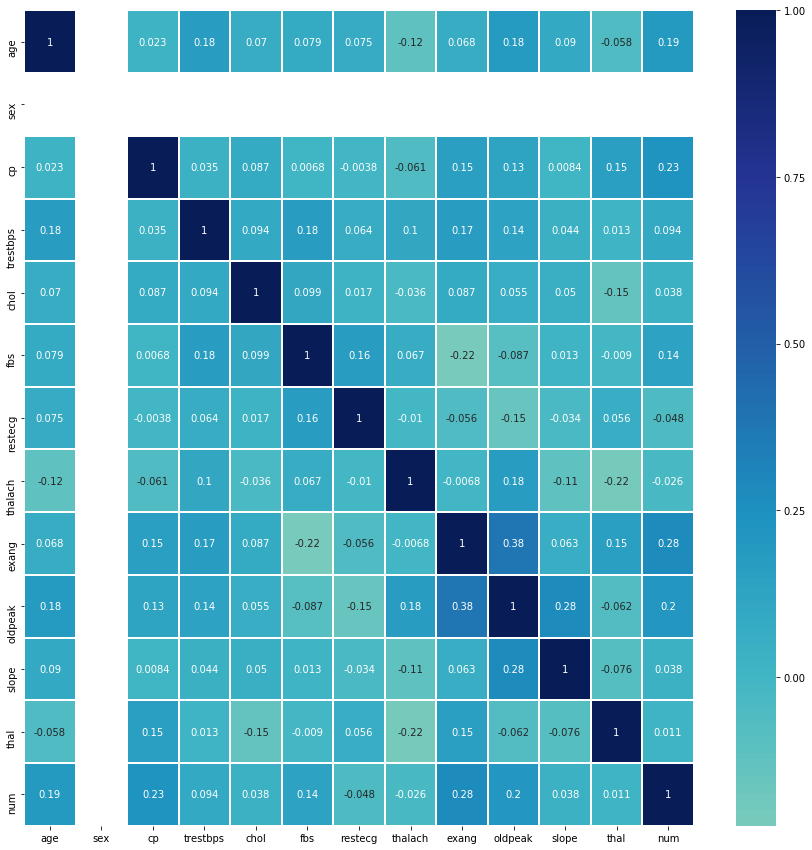

In [34]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

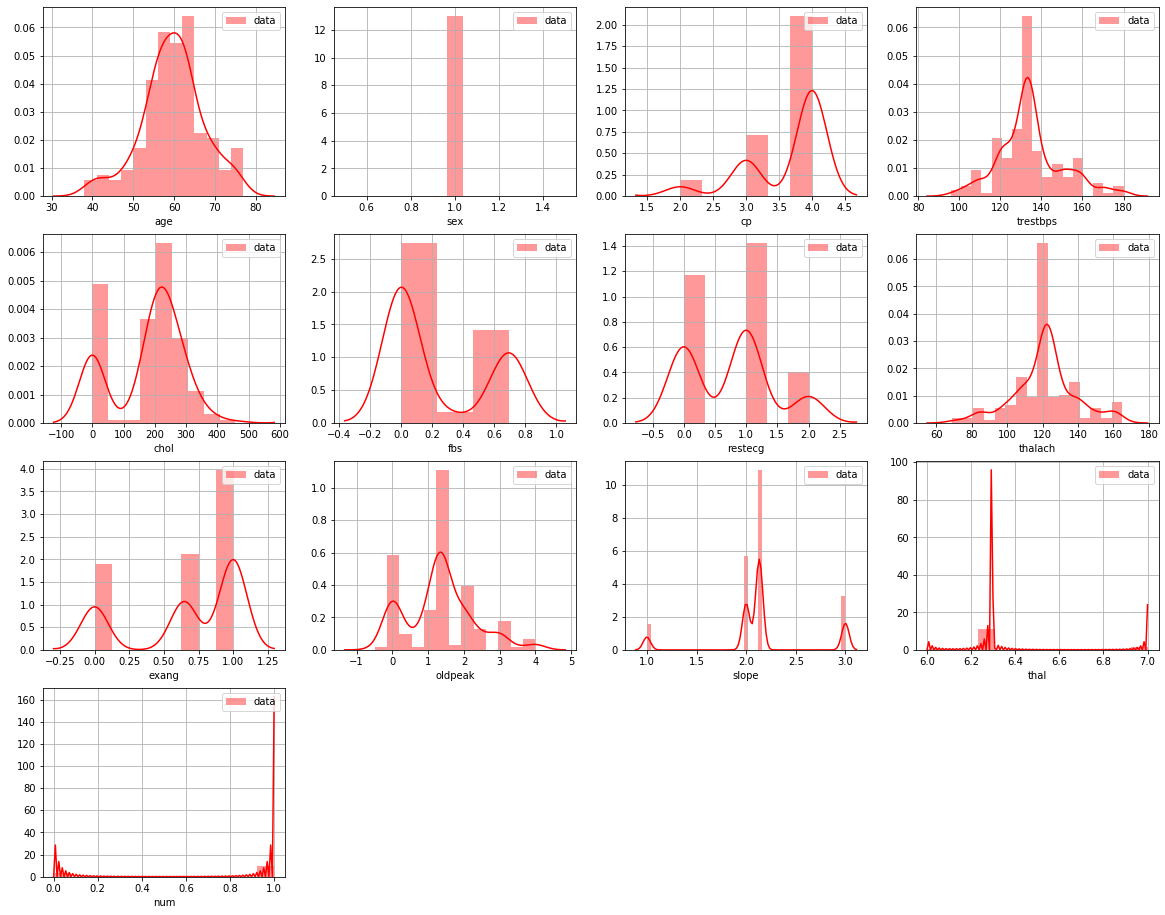

In [35]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

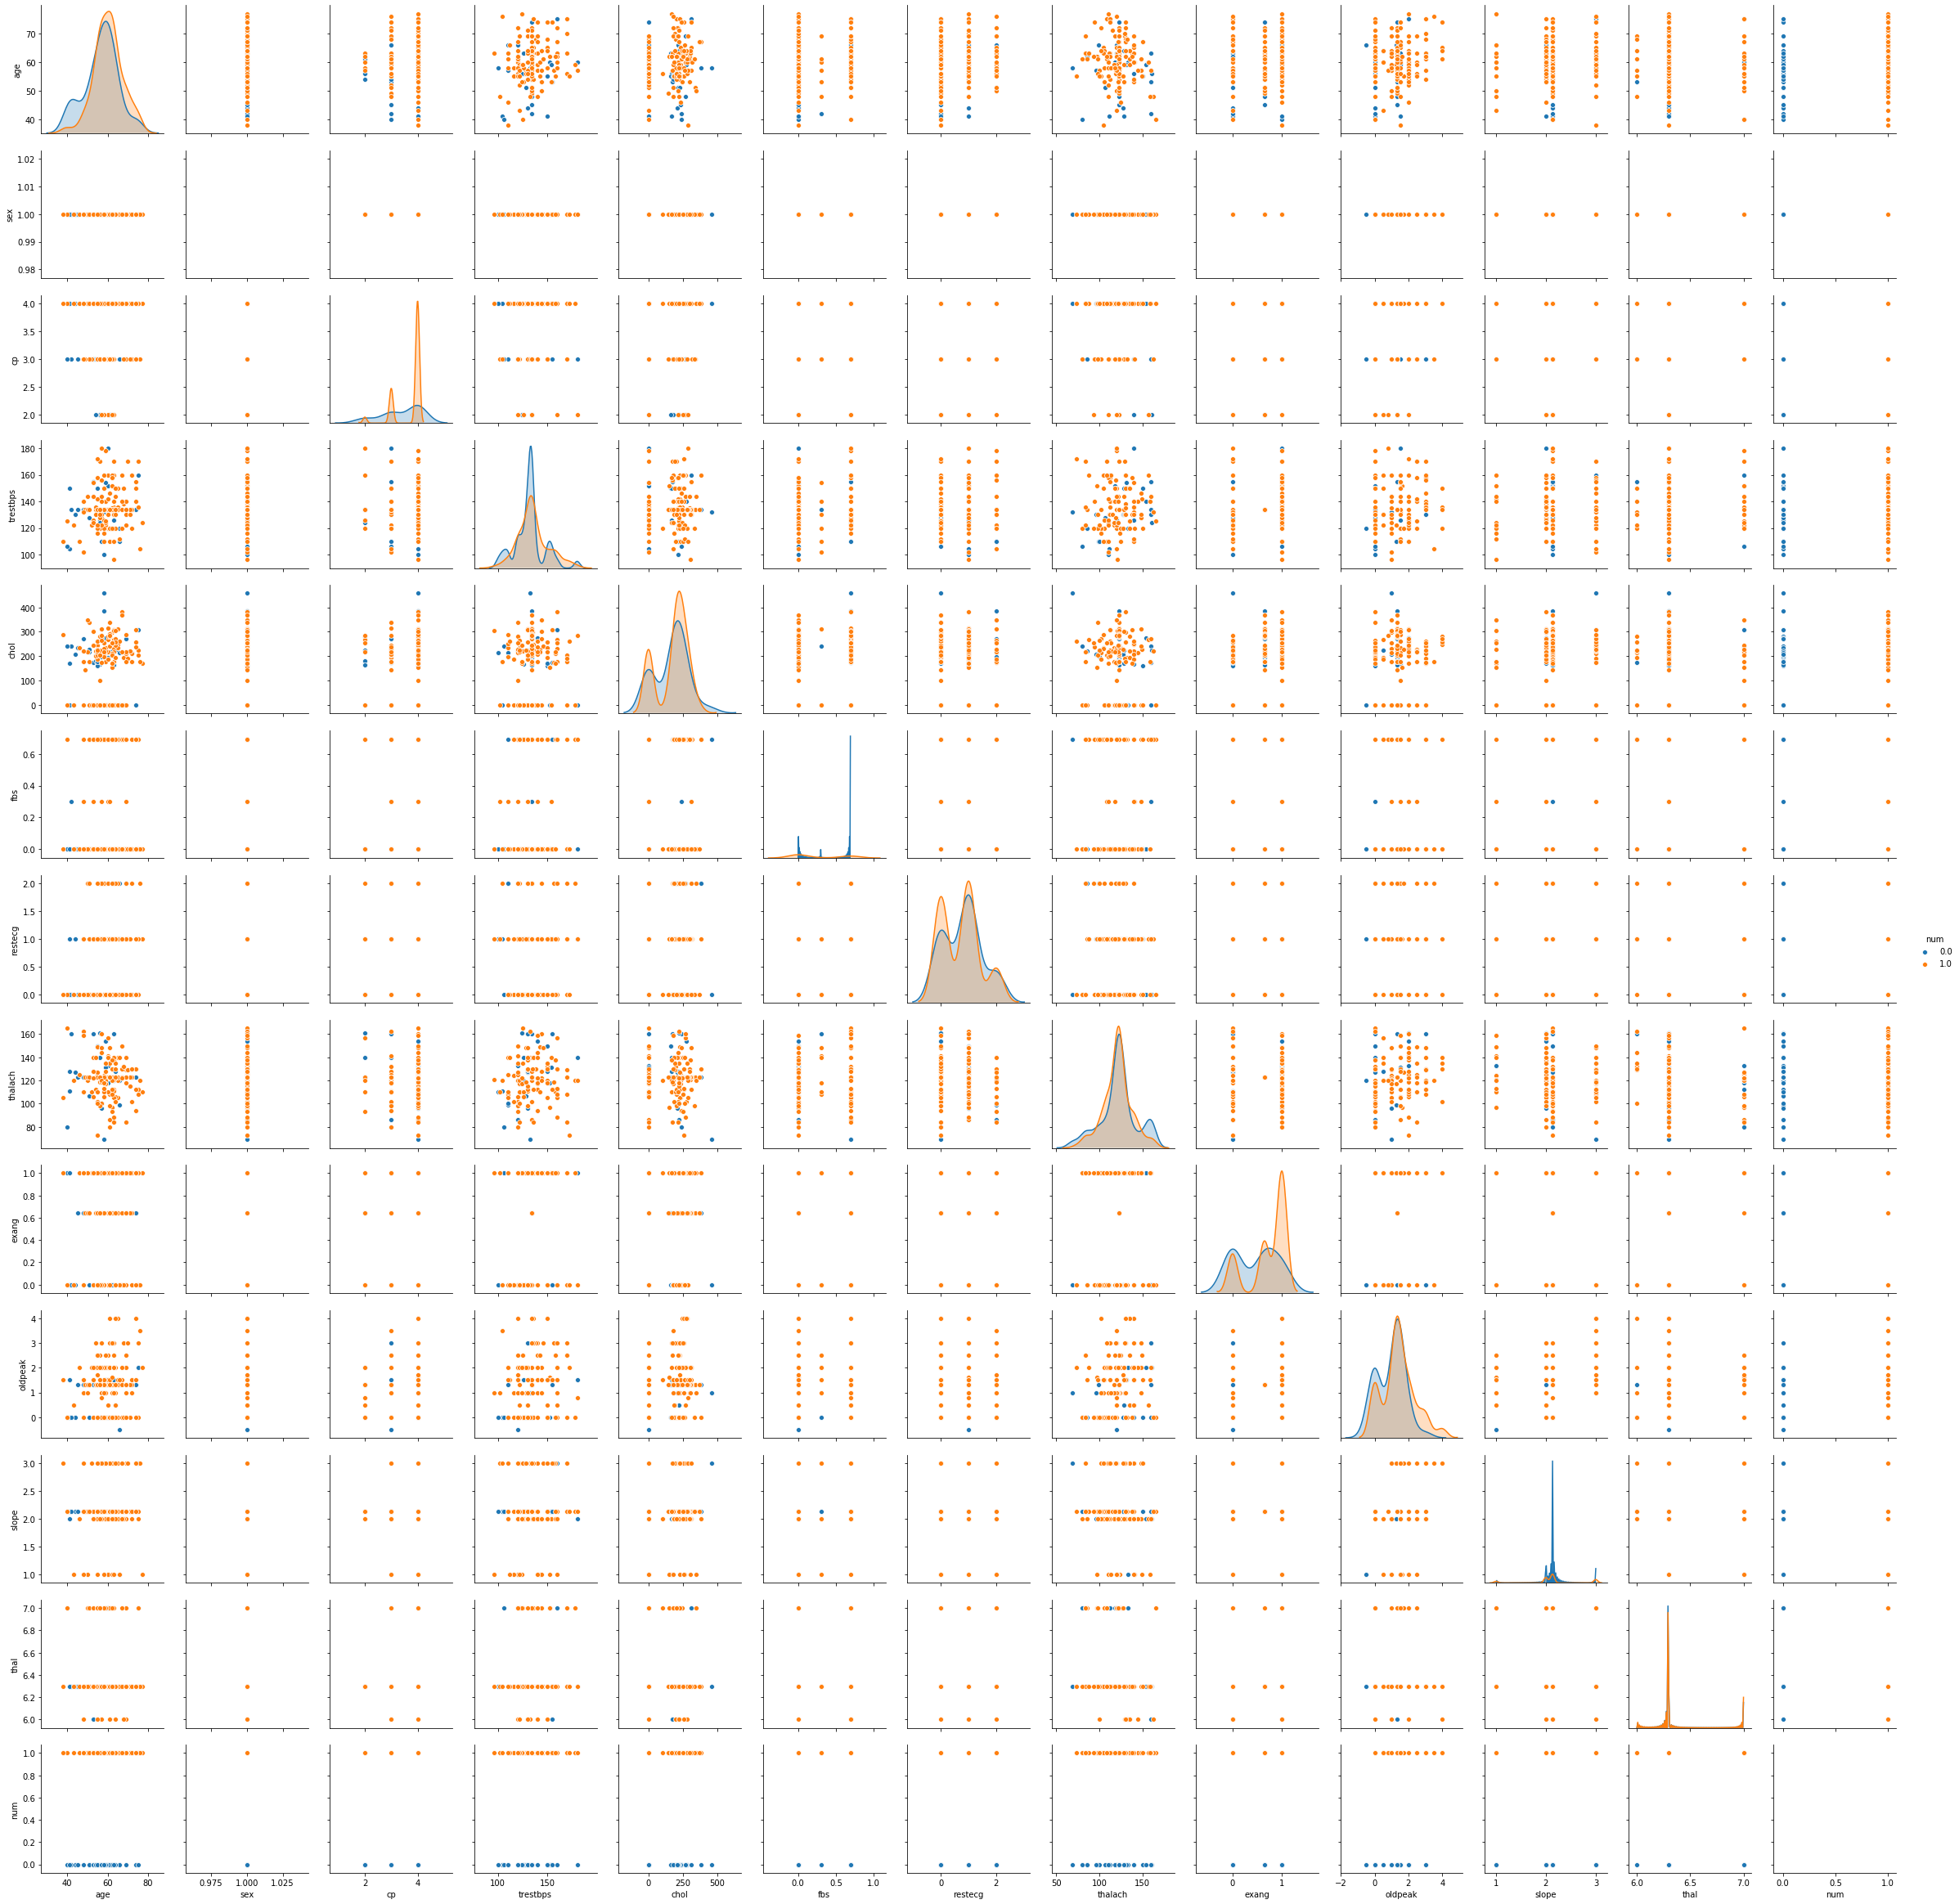

In [36]:
# Plotting Pairplot.....
sns.pairplot(df_new,hue='num')

In [37]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['num'],axis=1)
x1
print(x1.shape)

(177, 12)


In [38]:
# Setting up the Target value in variable y.
y=df_new['num']
y.shape

(177,)

In [39]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.455808,0.0,0.606751,0.342887,0.742777,-0.741734,0.374532,-0.523570,0.825963,1.761409,-0.317189,-0.281394
1,-2.069533,0.0,0.606751,-0.302209,0.286396,-0.741734,0.374532,0.325899,-1.667739,-1.399484,-0.030072,-0.281394
2,0.057070,0.0,0.606751,-0.173190,0.366934,-0.741734,0.374532,1.062107,0.825963,0.180963,1.847231,-0.281394
3,-0.607494,0.0,0.606751,0.471906,0.456421,-0.741734,0.374532,1.571788,0.825963,1.234594,-2.481608,-0.281394
4,0.854546,0.0,-1.071295,-1.592402,0.322191,1.408813,1.847692,-1.259777,0.825963,-0.029764,-0.317189,-0.281394
...,...,...,...,...,...,...,...,...,...,...,...,...
172,-0.873319,0.0,0.606751,0.600926,1.100724,1.408813,0.374532,0.382531,0.825963,0.180963,-0.317189,-0.281394
173,0.322895,0.0,0.606751,1.504061,-0.062601,-0.741734,0.374532,0.948844,0.825963,-1.399484,-0.030072,-0.281394
174,-0.607494,0.0,0.606751,-0.818286,0.411677,1.408813,0.374532,-1.203146,-1.667739,-1.399484,-0.030072,-1.526565
175,-0.208756,0.0,0.606751,-0.059402,1.861359,1.408813,1.847692,0.087817,-0.056163,-0.007813,-0.030072,-0.281394


# Model Training

In [40]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [41]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy')


{'criterion': 'gini', 'max_depth': 4, 'random_state': 1}


In [42]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy')


{'learning_rate': 0.01, 'n_estimators': 100}


In [43]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy')

{'n_neighbors': 10}


In [44]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy')

{'gamma': 0.001, 'random_state': 1}


In [45]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy')

{'C': 0.01}


In [46]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy')

{'max_features': 'log2', 'n_estimators': 500}


In [47]:
#     Grid Search for AdaBoostClassifier
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy')

{'n_estimators': 200}


In [48]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.01)
DT=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
RF=RandomForestClassifier(max_features= 'sqrt', n_estimators= 200,)
AD=AdaBoostClassifier(n_estimators=200,)
xgb=XGBClassifier()

In [49]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(("XG boost",XGBClassifier()))

In [50]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  63 is: 0.9166666666666666


Learning Score :  0.8085106382978723
Accuracy Score :  0.9166666666666666
Cross Val Score :  0.8130030959752321
roc auc score :  0.8125


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.62      0.77         8
         1.0       0.90      1.00      0.95        28

    accuracy                           0.92        36
   macro avg       0.95      0.81      0.86        36
weighted avg       0.92      0.92      0.91        36



Confusion Matrix:
 [[ 5  3]
 [ 0 28]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0

Max Accuracy Score corresponding to Random State  94 is: 0.8333333333333334


Learning Score :  1.0
Accuracy Score :  0.8333333333333334
Cross Val Score :  0.7548331613347093
roc auc score :  0.625


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         8
         1.0       0.82      1.00      0.90        28

    accuracy                           0.83        36
   macro avg       0.91      0.62      0.65        36
weighted avg       0.86      0.83      0.79        36



Confusion Matrix:
 [[ 2  6]
 [ 0 28]]







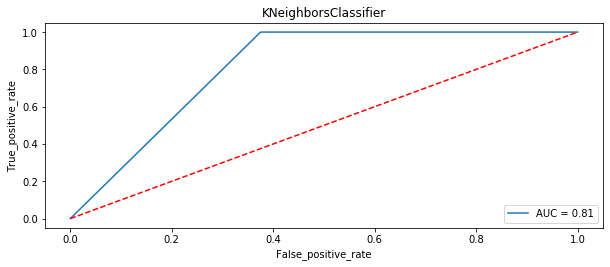

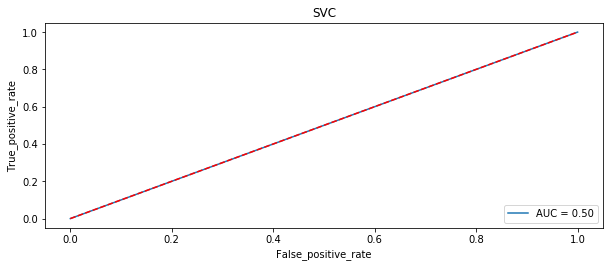

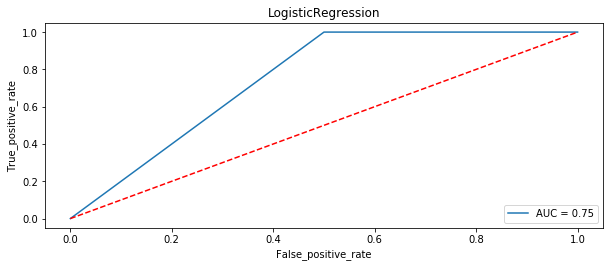

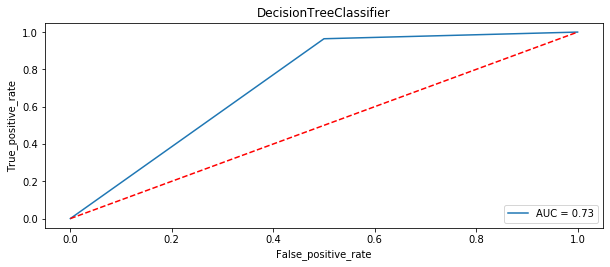

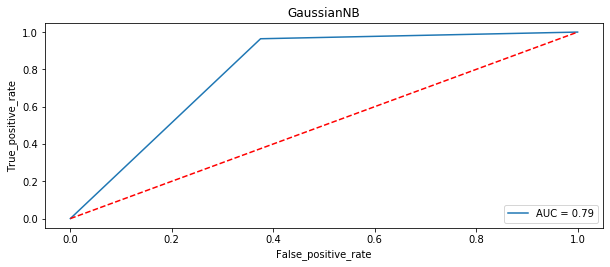

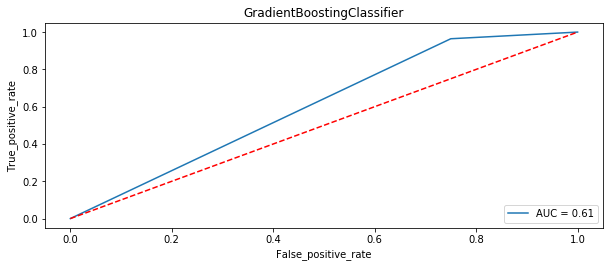

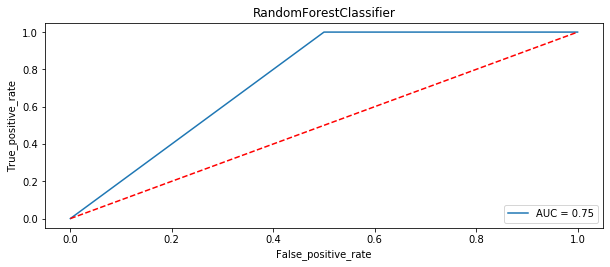

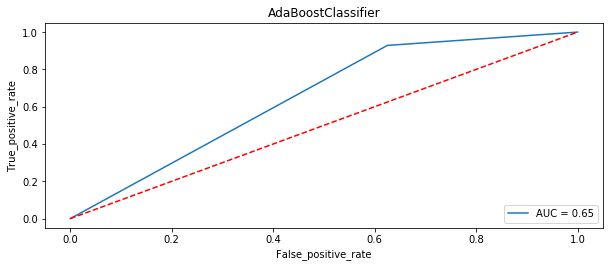

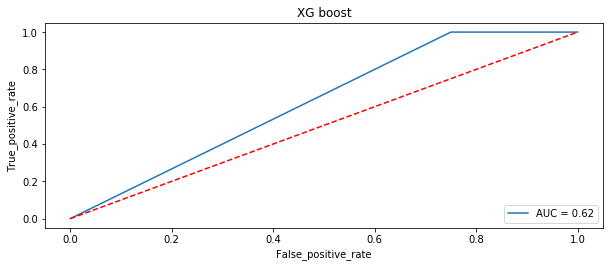

In [51]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    

In [52]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})   #'Roc_Auc_curve':rocscore
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,80.851064,91.666667,81.300310,81.250000
1,SVC,76.595745,77.777778,76.845545,50.000000
2,LogisticRegression,75.886525,88.888889,79.626763,75.000000
3,DecisionTreeClassifier,86.524823,86.111111,73.257654,73.214286
4,GaussianNB,77.304965,88.888889,79.103887,79.464286
5,GradientBoostingClassifier,82.978723,80.555556,74.002408,60.714286
6,RandomForestClassifier,100.000000,88.888889,76.721706,75.000000
7,AdaBoostClassifier,98.581560,80.555556,69.332645,65.178571
8,XG boost,100.000000,83.333333,75.483316,62.500000


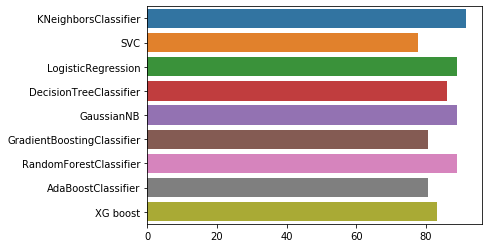

In [53]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score,)

## After all this process conclusion is that KNeighborsClassifier is performing well.

In [54]:
# Using KNeighborsClassifier for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=.20,stratify=y)
knr=KNeighborsClassifier(n_neighbors=10)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
knrpred=knr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,knrpred))
print('Confusion Matrix:',confusion_matrix(y_test,knrpred))
print('Classification Report:',classification_report(y_test,knrpred))

Accuracy Score: 0.9166666666666666
Confusion Matrix: [[ 5  3]
 [ 0 28]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      0.62      0.77         8
         1.0       0.90      1.00      0.95        28

    accuracy                           0.92        36
   macro avg       0.95      0.81      0.86        36
weighted avg       0.92      0.92      0.91        36



(2.0, 0.0)

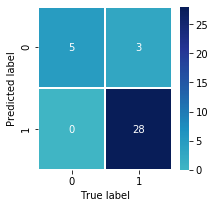

In [55]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, knrpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [56]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=knrpred
test
# On the lest side values are those which are taken by machine for test...

,num,Predicted values
108,0.0,0.0
178,1.0,1.0
149,1.0,1.0
53,0.0,0.0
120,1.0,1.0
43,0.0,1.0
38,1.0,1.0
173,1.0,1.0
40,1.0,1.0
1,0.0,0.0


In [57]:
# Saving the Predicted values in csv file
test.to_csv('Project_10_HeartDisease.csv') 

In [58]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(rf,'Project_10_HeartDisease.pkl')

['Project_10_HeartDisease.pkl']

## Conclusion:      

1) persons having heart disease are more.             
2) persons having heart disease are 149.                      
3) persons who don't have heart disease are 51.   
4) More number of persons have asymptomatic type chest pain. i.e 131 in numbers.     
5) Decending order of Chest pain type people have : asymptomatic > anginal > atypical angina > typical angina.    
6) Number of Males having heart diseases are more than the number of Females.      
7) Persons having more age are more prone to heart disease.      
8) Heart disease occurs in males occurs after the age of 45.      
9) According to the data which is less for females heart disease ocuurs after age of 50.       
10) Males have all types of chest pain while women have only atypical angina and asymptomatic types of chest pain.    
11) females have atypical angina type more than asymptomatic type.          
12) Women who has the heart disease got the value of thalach( maximum heart rate achieved) more than the number of males who       have the heart disease.      
13) Women who don't have the heart disease got the value of thalach( maximum heart rate achieved) less than the number of males     who have the heart disease.      
14) Persons who have heart disease do have more trestbps( resting blood pressure) than the persons who don't have heart             disaese.   


## Steps Followed:              

1) Data Analysis.                  
2) EDA Analysis.                         
3) Best parameters are found using Gridsearch cv and applied to models.                                                
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.         
5) AUC ROC Curves are made for each model.                       
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.                          
7) KNeighborClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.      
8) Predicted values are saved in Project_10_HeartDisease.csv file.                
9) Pickle file is named with Project_10_HeartDisease.pkl                                 